<a href="https://colab.research.google.com/github/ORCT/ds-section1-project/blob/main/Q3_max_sold_game_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스


In [1]:
from google.colab import files
files.upload();

Saving pre_vgames.csv to pre_vgames.csv


In [2]:
import pandas as pd

df = pd.read_csv('pre_vgames.csv',index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


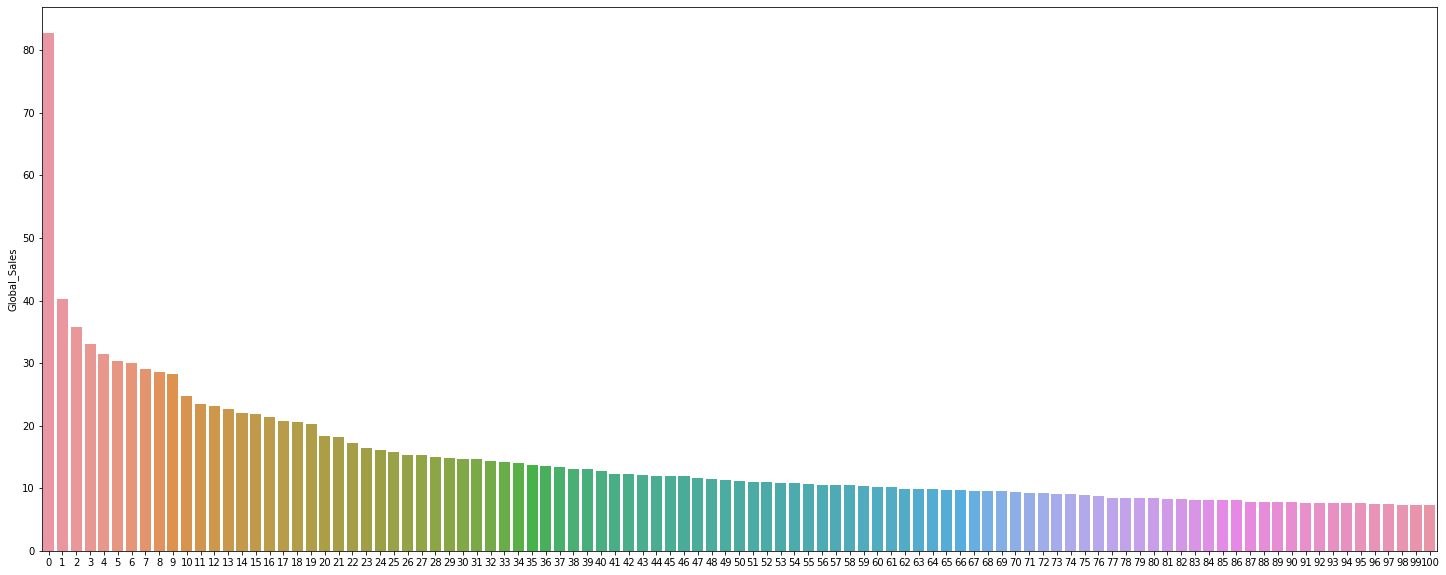

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df_descending = df.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:100,:]

plt.figure(figsize=(25,10))
sns.barplot(x=df_descending.index,y=df_descending['Global_Sales'])#10번째에서 점프하는 구간이 있고 20번째에서 점프하는 구간이 있으니 편한대로 선택해도 될 것 같다.

## - 단일 플랫폼 Top 10

In [4]:
df_top_10 = df.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]
df_top_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


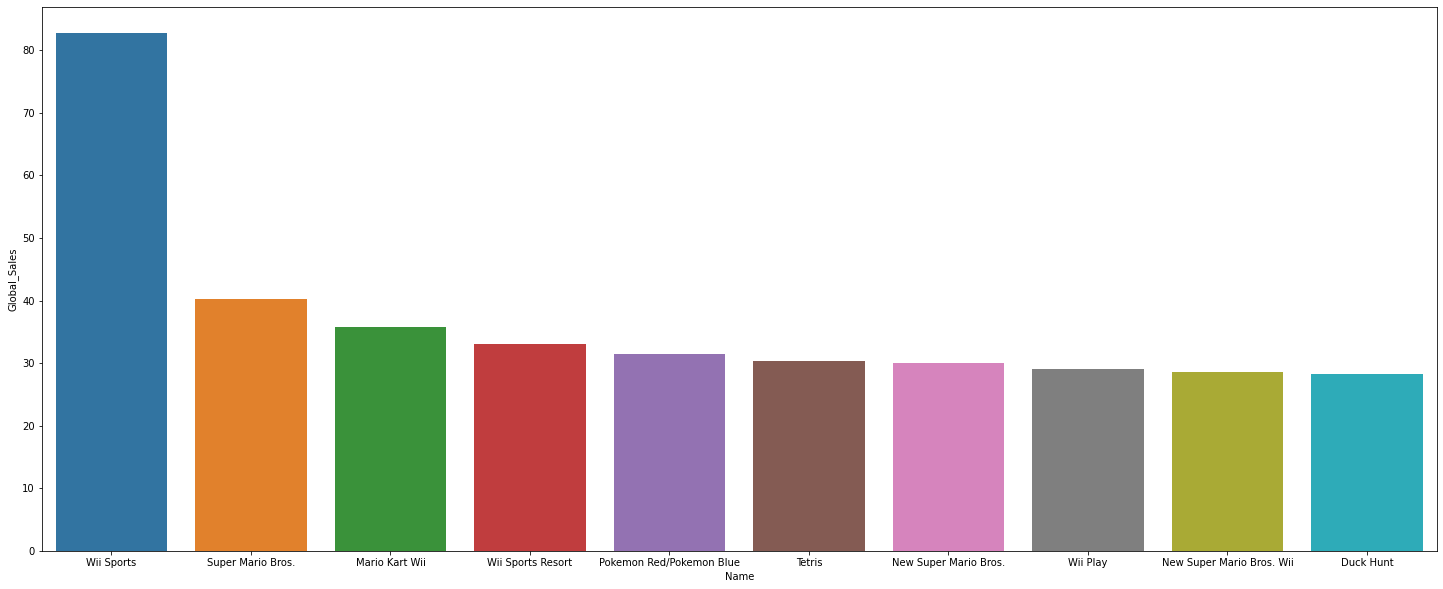

In [5]:
plt.figure(figsize=(25,10))
sns.barplot(x=df_top_10['Name'],y=df_top_10['Global_Sales'])

10개의 타이틀 모두 닌텐도 사에서 발매한 게임임을 알 수 있다. 그 중에서도 5개는 Wii 플랫폼으로 출시가 되었던 게임으로 Wii의 보급률이 상당했음을 짐작할 수 있다.

## - 멀티 플랫폼 Top 10

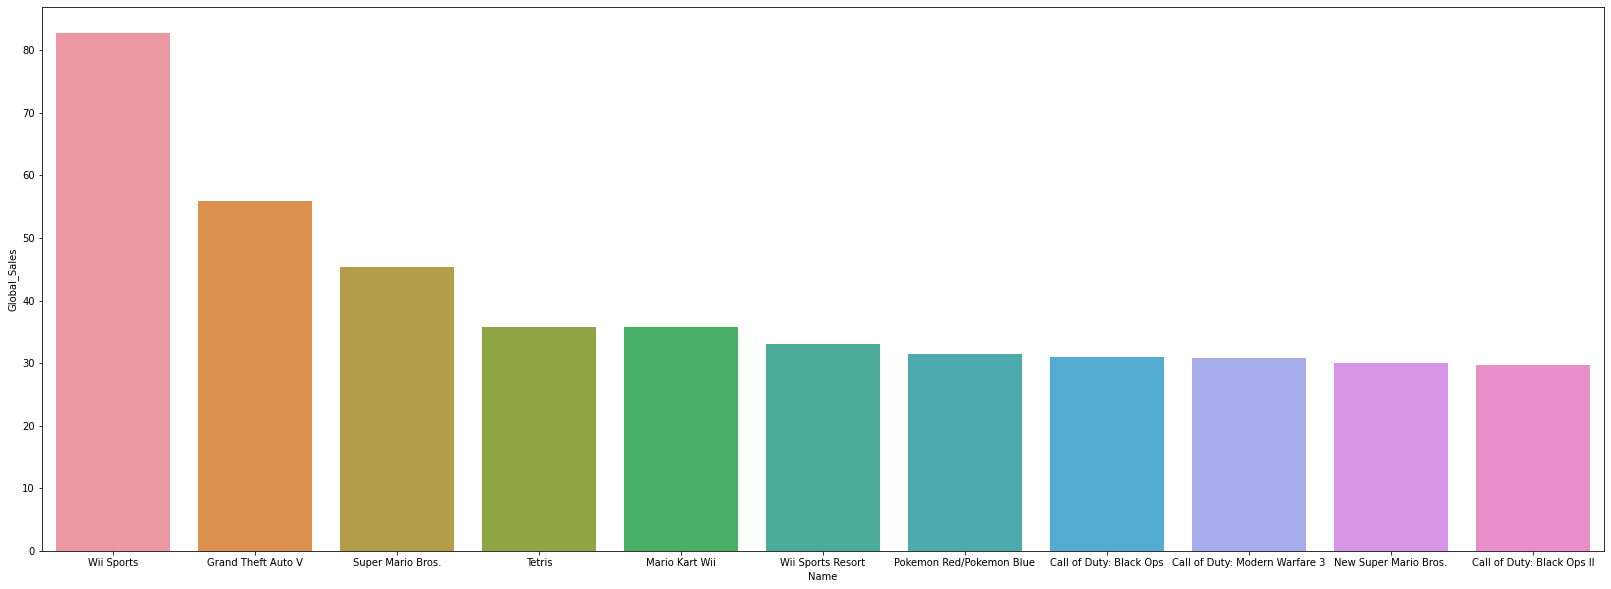

In [14]:
max_multi_pl = df.groupby('Name')['Global_Sales'].sum().to_frame().sort_values('Global_Sales',ascending=False).reset_index().loc[0:10]

plt.figure(figsize=(28,10))
sns.barplot(x='Name',y='Global_Sales',data=max_multi_pl)

멀티 플랫폼까지 고려했을 때는 순위에 변동이 생겼는데 닌텐도 사의 게임을 제외하면, GTA5와 Call of Duty 시리즈가 Top 10 안에 들어온 것을 볼 수 있다.

물론 Wii Sports의 아성을 깰 순 없었지만 Action 장르인 GTA5 가 2위를 했다는 점은 눈여겨 볼만하다.

## - Sports Top 10

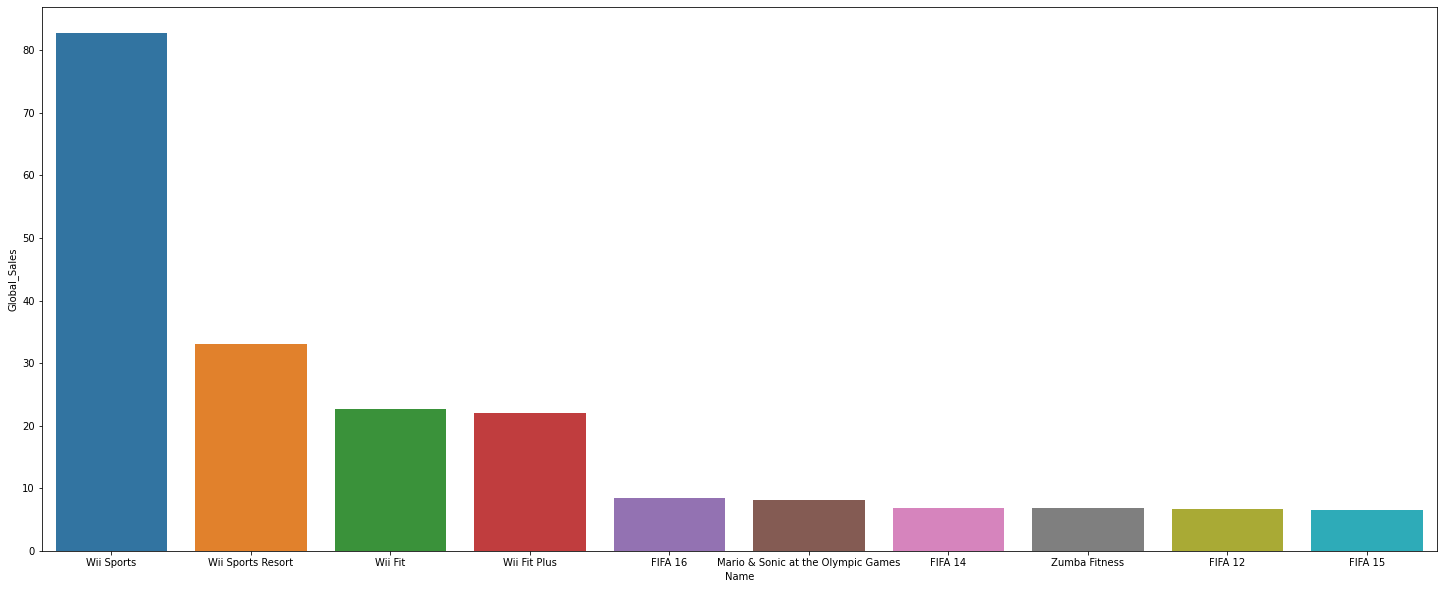

In [21]:
sports = df[df['Genre'] == 'Sports']
sports_top_10 = sports.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]

plt.figure(figsize=(25,10))
sns.barplot(x=sports_top_10['Name'],y=sports_top_10['Global_Sales'])

위에서도 스포츠 게임 상위 10개 중 피트니스적 성향을 띄고 있는 Wii Sports & Fit 시리즈가 상위권은 전부 석권하고 각각의 단일 판매량이 FIFA 16의 판매량보다 월등하게 판매량이 높은 것을 알 수 있다.

그렇다면 타이틀 최다 출고량은 Sports 장르니까 우리는 Sports 게임의 설계를 해야하는 것일까? 사실 그렇게 단순하게 분석할 수는 없다. Sports 장르에서도 Wii Sports는 상당히 이질적인데, FIFA 같은 대표적인 Sports 장르의 게임과 Wii Sports는 다른 양상을 보인다.

Wii Sports는 단순히 Sports 장르의 게임 타이틀이라기 보다 모션 인식 시스템을 이용한 피트니스가 결합된 제품이라고 봐야한다. 가정에서 가족들이 함께 몸을 움직이면서 놀 수 있는 놀이를 게임 타이틀로서 승화시킨 타이틀이라고 보는 것이 맞을 것이다.

실제로 닌텐도 사의 게임 철학은 모든 사람이 함께 어울려 놀 수 있는 것을 지향하고 있으니 Wii Sports는 닌텐도의 정신이 담겨있는 새로운 놀이라고 보는 것이 맞을 것 같다.

## - Action & Sports Top 10

In [22]:
a_and_s = df[(df['Genre'] == 'Sports') | (df['Genre'] == 'Action')]
a_s_top_10 = a_and_s.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:9,:]
#GTA5는 멀티플랫폼이라 합계를 구하고 플롯을 해야할 듯
a_s_top_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
3,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
4,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
5,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
6,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
7,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
8,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
9,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


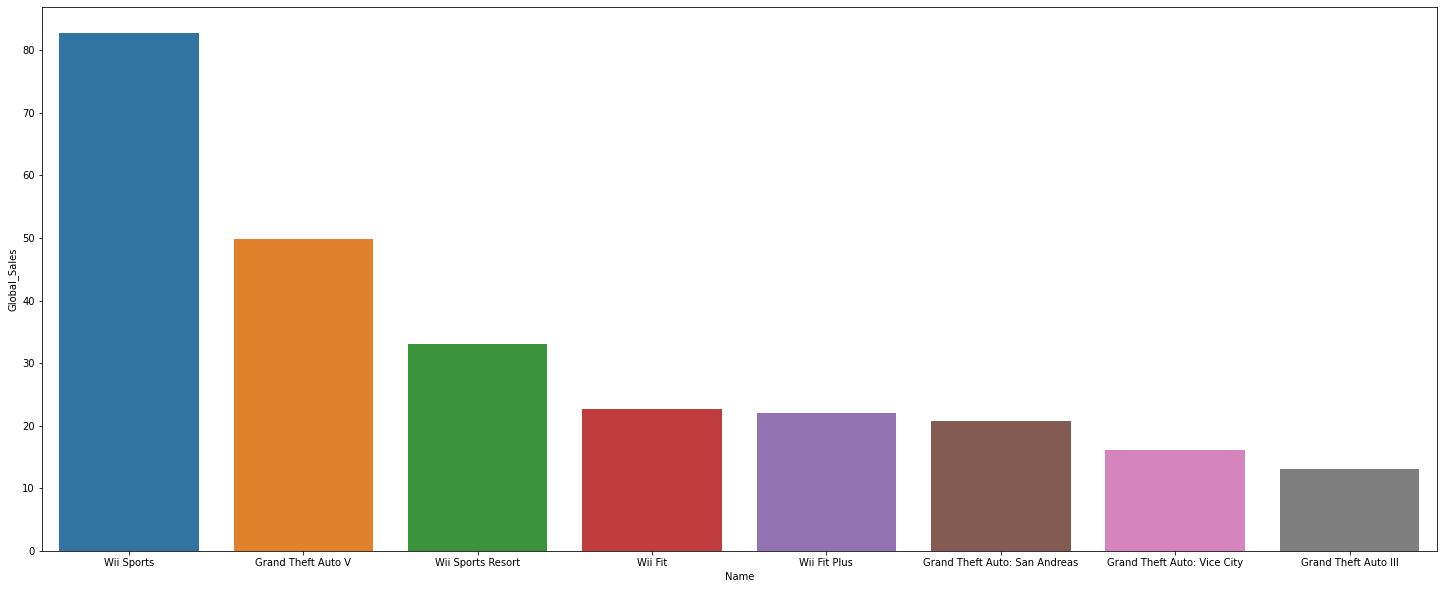

In [23]:
as_tmp = a_s_top_10.drop([4,6,9])
as_tmp1 = pd.DataFrame({'Name':[i for i in as_tmp['Name']], 'Global_Sales':[i for i in as_tmp['Global_Sales']]})
as_tmp1.loc[len(as_tmp1)] = ['Grand Theft Auto V', a_s_top_10.loc[4,'Global_Sales'] + a_s_top_10.loc[6,'Global_Sales'] + a_s_top_10.loc[9,'Global_Sales']]
as_tmp1 = as_tmp1.sort_values('Global_Sales', ascending = False)
# as_tmp = pd.DataFrame({'Name':[i for i in a_s_top_10['Name']]})
plt.figure(figsize=(25,10))
sns.barplot(x=as_tmp1['Name'],y=as_tmp1['Global_Sales'])

이번에는 액션과 스포츠 두 장르에서 출고량 TOP 10을 추렸더니 1위는 Wii Sports, 2위는 GTA5임을 알 수 있다.

GTA5는 멀티 플랫폼으로 출시 되었음에도 불구하고 Wii Sports의 출고량을 따라 잡지 못하는 것으로 미루어 볼 때 Wii Sports의 아성이 얼마나 대단했는지를 다시 한 번 알 수 있다.

## - 시리즈 별 출고량 Top 10

In [16]:
df_descending['Name'].loc[0:50].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
       'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
       'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus',
       'Kinect Adventures!', 'Grand Theft Auto V',
       'Grand Theft Auto: San Andreas', 'Super Mario World',
       'Brain Age: Train Your Brain in Minutes a Day',
       'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land',
       'Super Mario Bros. 3', 'Grand Theft Auto: Vice City',
       'Pokemon Ruby/Pokemon Sapphire', 'Pokemon Black/Pokemon White',
       'Brain Age 2: More Training in Minutes a Day',
       'Gran Turismo 3: A-Spec', 'Call of Duty: Modern Warfare 3',
       'Pokémon Yellow: Special Pikachu Edition',
       'Call of Duty: Black Ops', 'Pokemon X/Pokemon Y',
       'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops II',
       'Call of Duty: Modern War

In [25]:
#Wii Sports & Fit, FIFA, GTA, Call of Duty, Super Mario Bros, Tetris, Mario Cart, Pokemon, Super Mario, Nintendogs, Brain Age, Gran Turismo마리오랑 브로스 따로 모으는게 맞겠지
fifa = df[df['Name'].str.contains('FIFA')]
wii_sports = df[(df['Name'].str.contains('Wii Sports')) | (df['Name'].str.contains('Wii Fit')) | (df['Name'].str.contains('Wii Play'))]
gta = df[df['Name'].str.contains('Grand Theft Auto')]
cod = df[df['Name'].str.contains('Call of Duty')]
supermario = df[df['Name'].str.contains('Super Mario')]
tetris = df[df['Name'].str.contains('Tetris')]
pokemon = df[df['Name'].str.contains('Pokemon')]
mariocart = df[df['Name'].str.contains('Mario Kart')]
brainage = df[df['Name'].str.contains('Brain Age')]
gran = df[df['Name'].str.contains('Gran Turismo')]

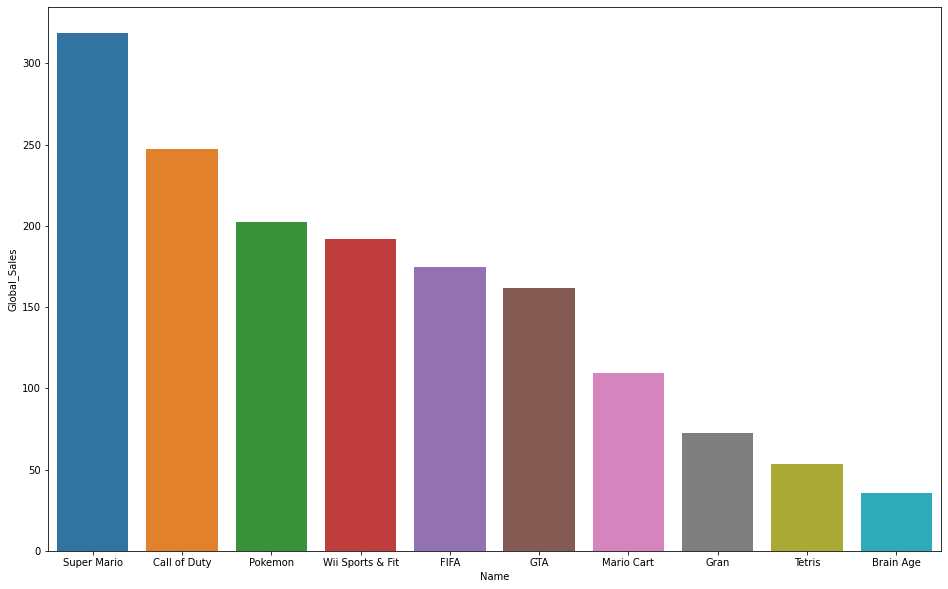

In [26]:
tmp = pd.DataFrame({'Name':['Wii Sports & Fit', 'FIFA', 'GTA', 'Call of Duty', 'Super Mario', 'Tetris', 'Pokemon', 'Mario Cart', 'Brain Age', 'Gran'],
                    'Global_Sales':[wii_sports['Global_Sales'].sum(), fifa['Global_Sales'].sum(), gta['Global_Sales'].sum(), cod['Global_Sales'].sum(),
                                    supermario['Global_Sales'].sum(), tetris['Global_Sales'].sum(), pokemon['Global_Sales'].sum(), mariocart['Global_Sales'].sum(),
                                    brainage['Global_Sales'].sum(), gran['Global_Sales'].sum()]}).sort_values('Global_Sales', ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x=tmp['Name'],y=tmp['Global_Sales'])

단일 타이틀 판매량 기준으로 상위 50 타이틀중에서도 상위 10 타이틀을 뽑아 모든 시리즈의 출고량을 구했더니 Super Mario 시리즈의 출고량이 가장 높은 것으로 나왔다.

다만 Super Mario 타이틀의 경우 월드나 브라더스 등으로 분화되는 것을 감안했을 때 단순하게 시리즈라고 보기는 힘들 것이다.

또한 Call of Duty 시리즈의 출고량이 2번째로 높은데 연도별 트렌드 분류에서 Shooter 장르가 크게 두각을 드러내지 못했던 것을 감안하면 상당히 높은 인기도를 보이는 것을 알 수 있다.

## - 플랫폼 별 Top 3

In [27]:
#이번엔 플랫폼 별로 출고량을 확인해보자
df['Platform'].unique()#너무 많고 옛날 플랫폼도 많으니까 최근 5년에 게임 발매가 됐던 플랫폼만 보자
recent_game = df[df['Year'] >= 2016]
recent_game['Platform'].unique()#PS4, XOne, PC

array(['PS4', 'PS3', 'X360', 'PSV', 'PC', 'WiiU', '3DS', 'XOne', 'DS'],
      dtype=object)

공식적으로 단종된 플랫폼을 제외하고 최근까지 신작 게임이 발매가 되었던 플랫폼(PS4, XOne, PC)별로 장르와 게임을 알아보자.


In [28]:
ps4 = df[df['Platform'] == 'PS4']
xone = df[df['Platform'] == 'XOne']
pc = df[df['Platform'] == 'PC']

len(ps4), len(xone), len(pc) # 각 플랫폼 별 게임 타이틀 개수

(336, 213, 955)

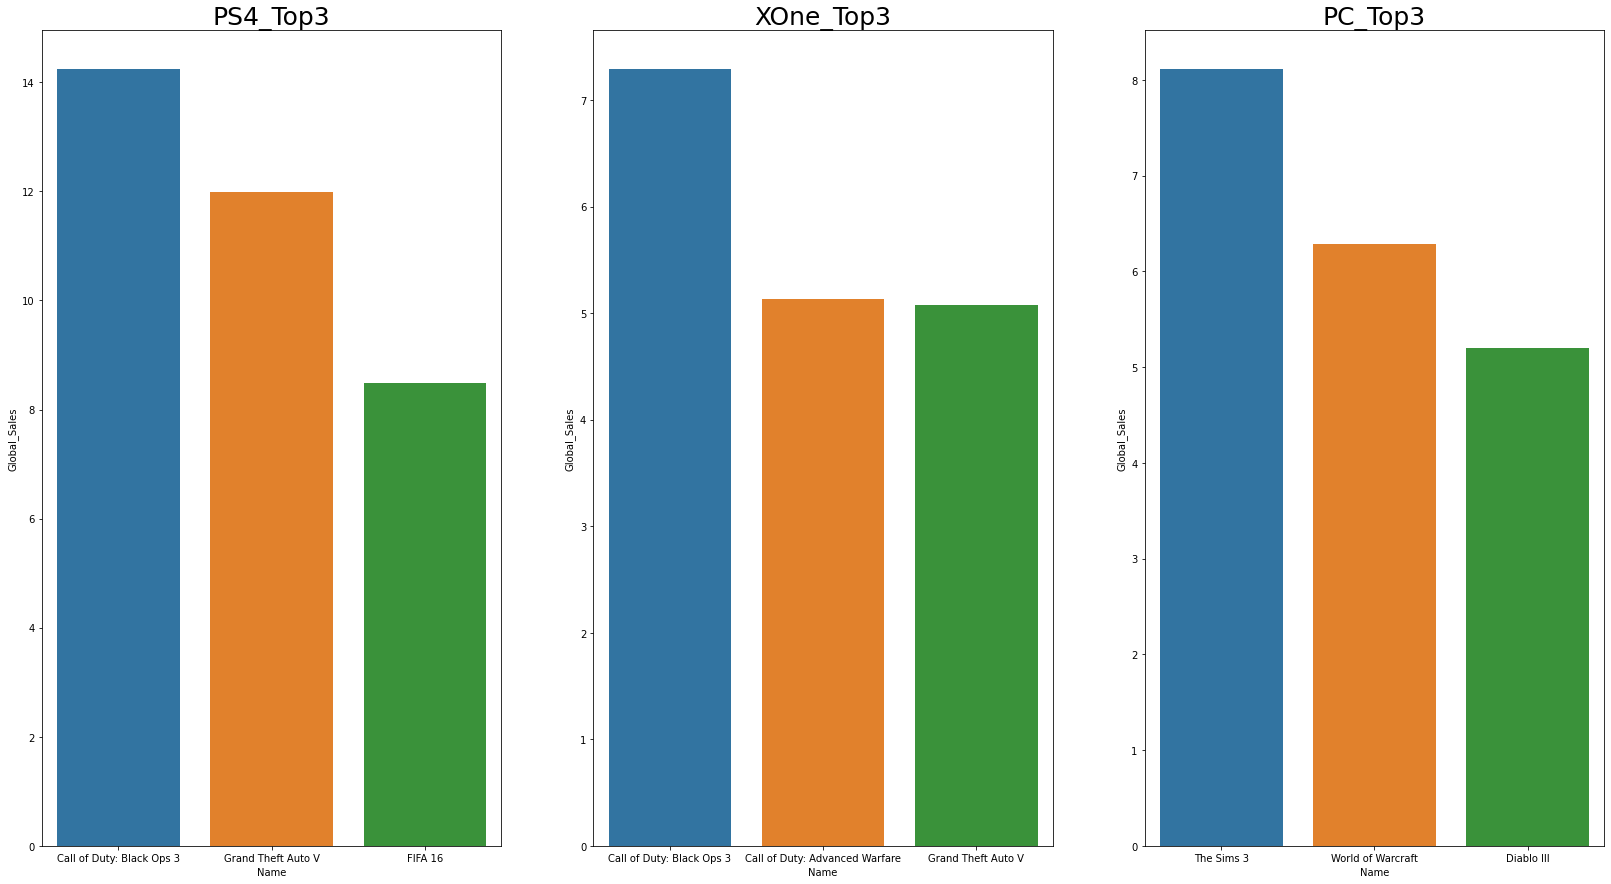

In [29]:
ps4_top3_title = ps4.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:2, :]
xone_top3_title = xone.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:2, :]
pc_top3_title = pc.sort_values('Global_Sales',ascending=False).reset_index(drop=True).loc[0:2, :]

fig, axs = plt.subplots(figsize=(28, 15), nrows=1, ncols=3)
sns.barplot(x='Name',y='Global_Sales',data=ps4_top3_title, ax=axs[0])
sns.barplot(x='Name',y='Global_Sales',data=xone_top3_title, ax=axs[1])
sns.barplot(x='Name',y='Global_Sales',data=pc_top3_title, ax=axs[2])

axs[0].set_title("PS4_Top3",fontsize=25)
axs[1].set_title("XOne_Top3",fontsize=25)
axs[2].set_title("PC_Top3",fontsize=25)
plt.show()

플랫폼 별 가장 많이 팔린 타이틀을 살펴 봤을 때는 PS4, XOne 에서 Call of Duty : Black Ops 3가, PC에서는 The Sims 3가 가장 많이 팔렸다.

예상 외로 가장 잘 팔린 단일 타이틀은 액션 장르가 아님(슈터, 슈터, 시뮬레이션)을 볼 수 있다. 또한 모든 플랫폼의 Top3 타이틀이 전부 시리즈 물임이 눈여겨 볼만한 점이라고 생각된다.

이번에는 플랫폼 별 Top3 발매 장르를 알아보자